### クラスタリング
* データセットをクラスタを呼ばれるグループに分割sるタスク
* 同じクラスタ内のデータが類似していて、異なるクラスタのデータは異なるように。データを分割すること

#### k-meansクラスタリング
*　データのある領域を代表するようなクラスタ重心をもつけようとする

##### 手順
* 個々のデータポイントを最寄りのクラスタあああああ重心に割り当てる。
* 次に、個々のクラスタ重心をその点も割り当てられたデータポイントの平均に設定する→データの割り当てが変化しなくなったら終了

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn as mg
%matplotlib inline

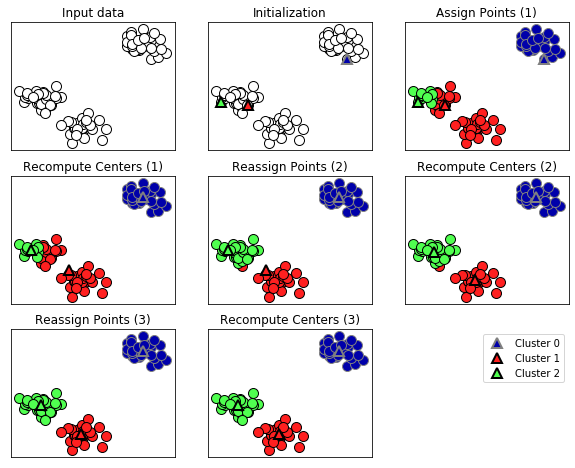

In [2]:
mg.plots.plot_kmeans_algorithm()

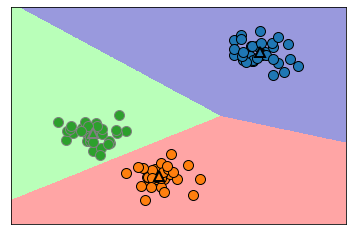

In [3]:
mg.plots.plot_kmeans_boundaries()

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
print("Cluster membership:\n{}".format(kmeans.labels_))

Cluster membership:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [7]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


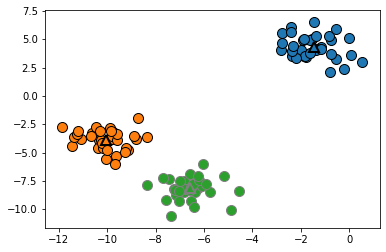

In [10]:
mg.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mg.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
                    markers = '^', markeredgewidth = 2)

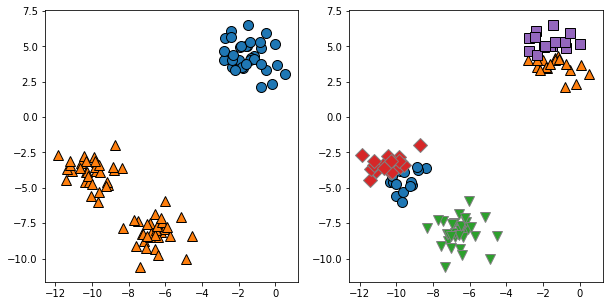

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mg.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mg.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0, 0.5, 'feature 1')

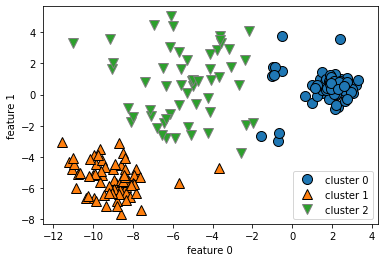

In [14]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mg.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"],loc = 'best')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'Feature 1')

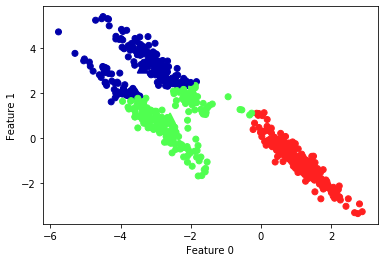

In [16]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = mg.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = '^',
            c = [0, 1, 2], s = 100, linewidths=2, cmap=mg.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

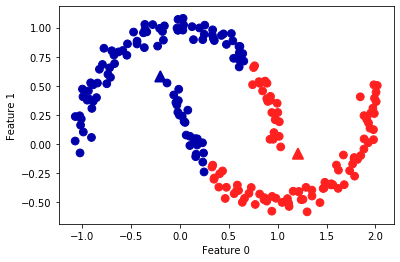

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mg.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^',
           c=[mg.cm2(0), mg.cm2(1)], s=100, linewidths=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### ベクトル量子化、成分分解としてのk-means
* PCA:データの中の最も分散が大きい方向群を見出す。
* NMF:足し込んでいくことのできる成分を探す
* k-means:クラスタセンタで個々のデータポイントを表現する
* ベクトル量子化：k-means単一成分で個々のデータポイントを表現する成分手法として見る

In [38]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

In [31]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
nmf = NMF(n_components = 100, random_state = 0)
nmf.fit(X_train)
pca = PCA(n_components = 100, random_state = 0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state = 0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

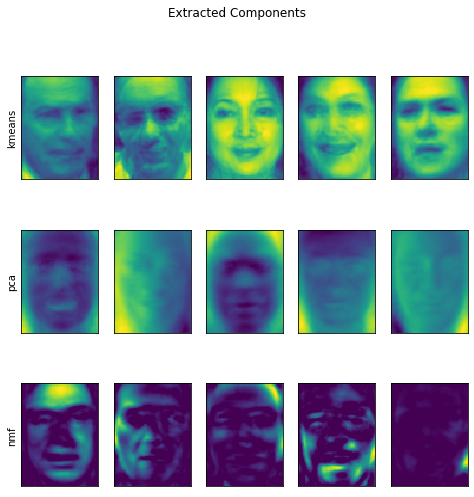

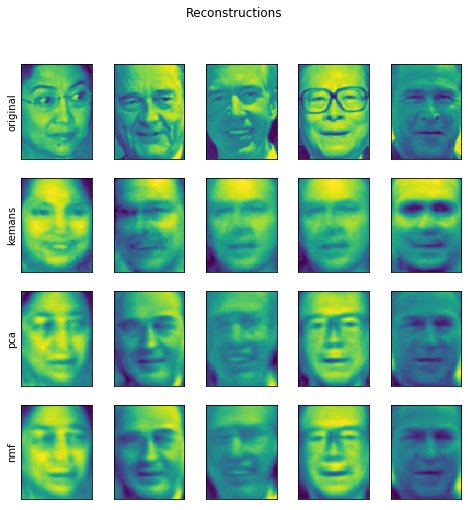

In [39]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks' : (), 'yticks' : ()})

fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf, in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')    
    ax[2].imshow(comp_nmf.reshape(image_shape))    
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, figsize=(8, 8), subplot_kw={'xticks' : (), 'yticks' : ()})
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))    
    ax[2].imshow(rec_pca.reshape(image_shape))    
    ax[3].imshow(rec_nmf.reshape(image_shape))    
    
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kemans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")


Cluster membership:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


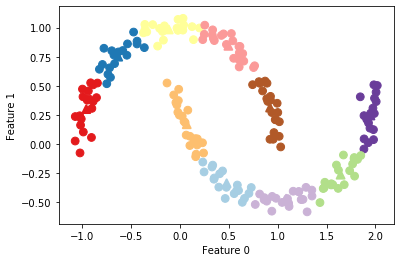

In [40]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s= 60, cmap="Paired")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^',
           c=range(kmeans.n_clusters), linewidths=2, cmap="Paired")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster membership:\n{}".format(y_pred))

In [41]:
distance_feature = kmeans.transform(X)
print("Distance feature shape:{}".format(distance_feature.shape))
print("Distance features:\n{}".format(distance_feature))

Distance feature shape:(200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


#### k-meansクラスタリング
* 大規模データセットにも適用できる
* 非常に大規模なデータセットを処理できる（MiniBatchKMeansもある）

#### 欠点
* 初期化が乱数で行われている。（アルゴリズムの出力が乱数のシードに依存する）
* クラスタの形に対してかなり制約の強い仮定を置いている。探しているクラスタの数をユーザが指定する必要がある。

#### 凝集型クラスタリング（agglomerative clustering）
* ある原則に基づく一連のクラスタリングアルゴリズム。
* 個々のデータポイントをそれぞれ個別のクラスタとして開始し、最も類似した二つのクラスタを併合していく。（クラスタの数を指定する）
* 最も類似したクラスタを決定する連結度には様々なものがある。

#### 連結度
* ward: デフォルト。併合した際にクラスタの内の分散の増分が最小になるようにクラスタを選択する。多くの場合、比較的同じサイズのクラスタになる 
* average: これを用いると、クラスタ間の全てのポイント間の距離の平均値が最小の二クラスタを併合する
* complete: これは（最大連結度）二つのクラスタの点間の距離の最大値が最小となるものを連結する

####
* 多くの場合wardで十分。データポイントの数が極端に違う場合（一つだけ他のものよりずっと大きいような場合）は他の二つの方が良いかもしれない

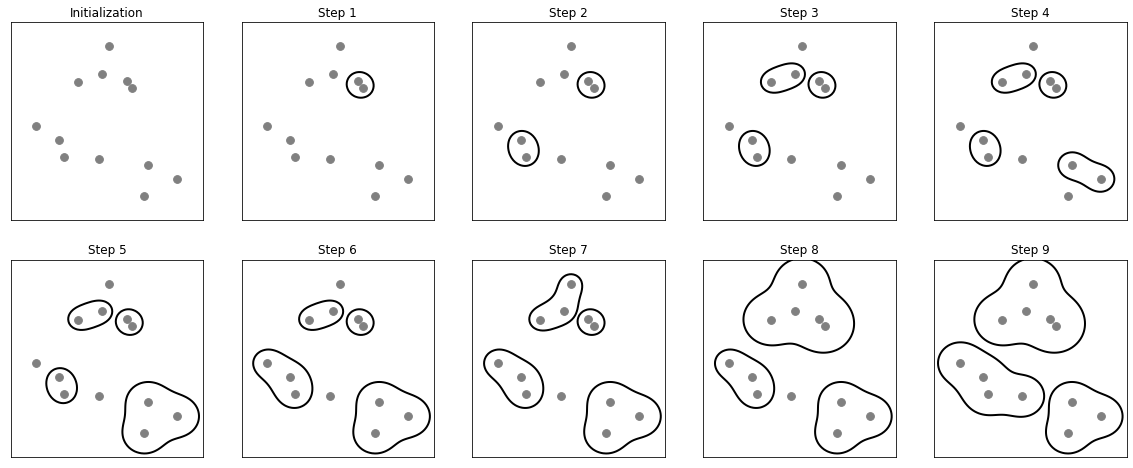

In [42]:
mg.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

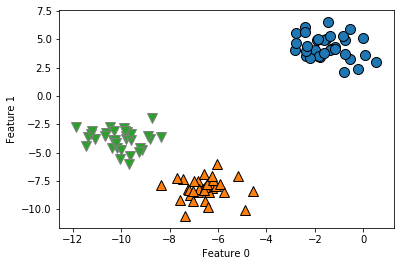

In [43]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mg.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 階層型クラスタリング
* 凝集型クラスタリングを行うと、階層型クラスタリングが行われる。（同じ手続きを繰り返すことで行われる。）
* 階層型クラスタリングを可視化する**デンドログラム**がある。（多次元のデータセットを扱うことができる）

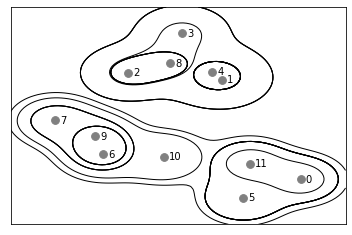

In [44]:
mg.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

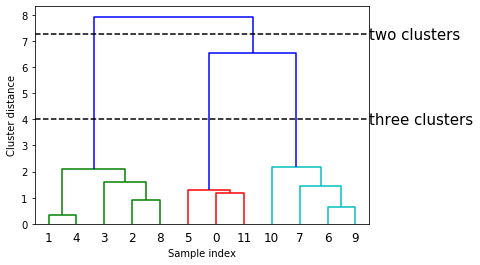

In [45]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size' : 15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size' : 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

#### DBSCAN
* destiny-based spatial culstering of applications with noise: 密度に基づくノイズあり空間クラスタリング
* ユーザがクラスタを先験的に与える必要がない
* どのクラスタにも属さない点を判別できる点
* 凝集型クラスタリングよりもk-meansよりも遅いが、比較的大きいデータセットに対応できる

#### 用語
* 高密度：特徴空間に置いて、多くの点が近接している（混んでいる）領域に属する点を見つける。この特徴空間の領域。
* コアサンプル：高密度領域の中にあるデータポイントのこと。
* 二つのパラメータ：min_sample,eps
* ノイズ：どのクラスタにも属さないこと

In [46]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


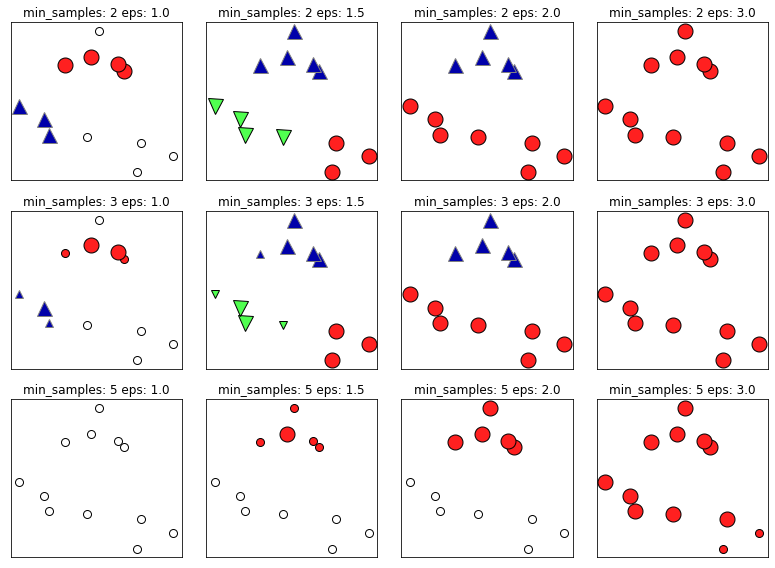

In [47]:
mg.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

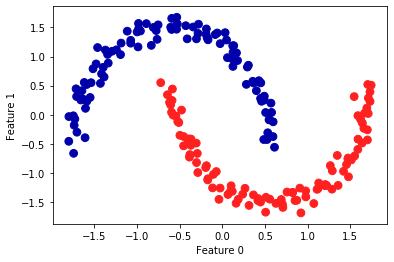

In [49]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mg.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### 正解データを用いたクラスタリングの評価
* クラスタリングアルゴリズムの出力を、正解データクラスタリングと比較して評価するために用いられる指標が以下の二つである。
* 調整ランド指数(ajusted rand index:ARI)
* 正則化相互情報量(normalized mutual information:NMI)
* いずれも定量的な指標で最良の場合は１、関係のない場合は０（ARIは負の値になりうる）

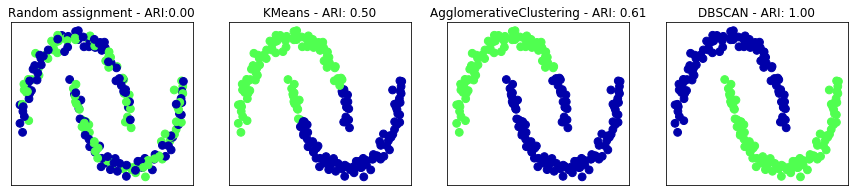

In [52]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks' : (), 'yticks' : ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mg.cm3, s=60)
axes[0].set_title("Random assignment - ARI:{:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mg.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                          adjusted_rand_score(y, clusters)))

In [53]:
#間違え
from sklearn.metrics import accuracy_score
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

print("Accuracy:{:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI:{:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy:0.00
ARI:1.00


#### 正解データを用いないクラスタリングの評価
* クラスタリングアルゴリズムを用いる際には、実際には結果と比較するための正解データがない場合が多い。
* もしわかっているならクラス分類器のような教師あり学習を用いた方が良い
* 正解データを必要としないクラスタリングの指標がある。（シルエット係数）
* クラスタのコンパクトさを計算する。完全な場合で１。

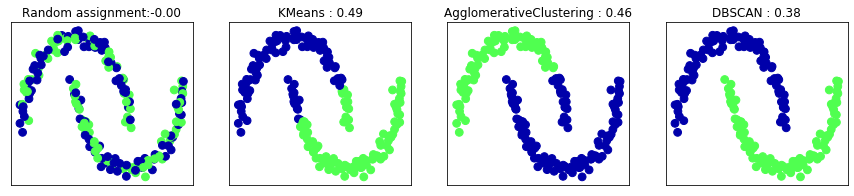

In [56]:
from sklearn.metrics.cluster import silhouette_score
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={"xticks" : (), "yticks" : ()})
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mg.cm3, s=60)
axes[0].set_title("Random assignment:{:.2f}".format(silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mg.cm3, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                          silhouette_score(X_scaled, clusters)))

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [64]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels:{}".format(np.unique(labels)))

Unique labels:[-1]


In [65]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels:{}".format(np.unique(labels)))

Unique labels:[-1]


In [66]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels:{}".format(np.unique(labels)))

Unique labels:[-1  0]


In [67]:
print("Number of points per cluster:{}".format(np.bincount(labels + 1)))

Number of points per cluster:[  31 1778]


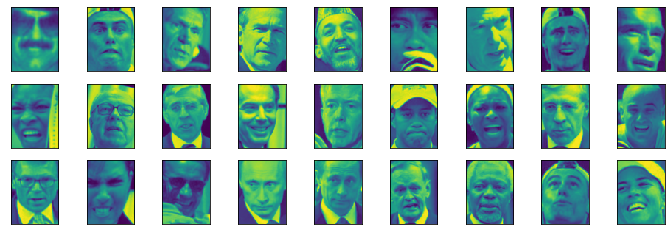

In [69]:
noise = X_people[labels == -1]
fig, axes = plt.subplots(3, 9, subplot_kw={"xticks" : (), "yticks" : ()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [71]:
for eps in [1,3,5,7,9,11,13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present : {}".format(np.unique(labels)))
    print("Clusters size : {}".format(np.bincount(labels + 1)))    


eps=1
Clusters present : [-1]
Clusters size : [1809]

eps=3
Clusters present : [-1]
Clusters size : [1809]

eps=5
Clusters present : [-1]
Clusters size : [1809]

eps=7
Clusters present : [-1  0  1  2  3  4  5  6  7]
Clusters size : [1762   13    5   14    3    3    3    3    3]

eps=9
Clusters present : [-1  0  1  2  3  4]
Clusters size : [1120  677    3    3    3    3]

eps=11
Clusters present : [-1  0]
Clusters size : [ 375 1434]

eps=13
Clusters present : [-1  0]
Clusters size : [ 110 1699]


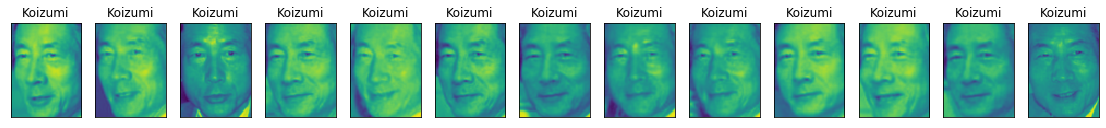

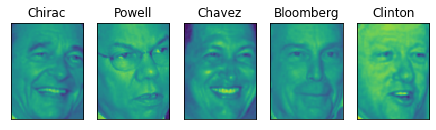

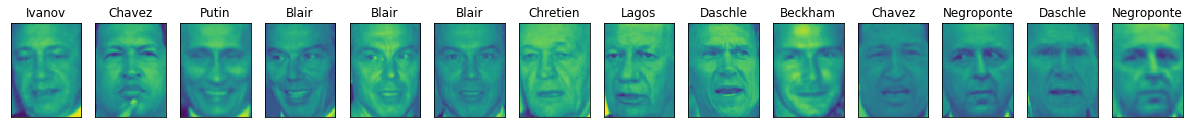

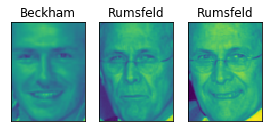

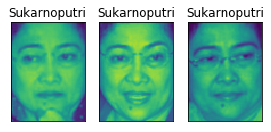

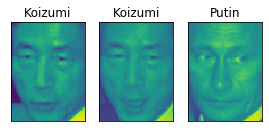

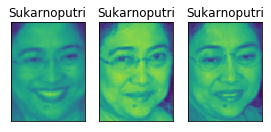

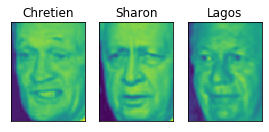

In [72]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_image = np.sum(mask)
    fig, axes = plt.subplots(1, n_image, figsize=(n_image * 1.5, 4), 
                            subplot_kw={"xticks" : (), "yticks" : ()})
    for image, label, ax, in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [73]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means:{}".format(np.bincount(labels_km)))

Cluster sizes k-means:[ 99 141 105 159 262 207 323 251 187  75]


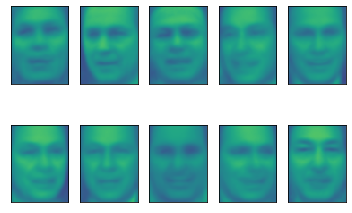

In [75]:
fig, axes = plt.subplots(2, 5, subplot_kw={"xticks" : (), "yticks" : ()})
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

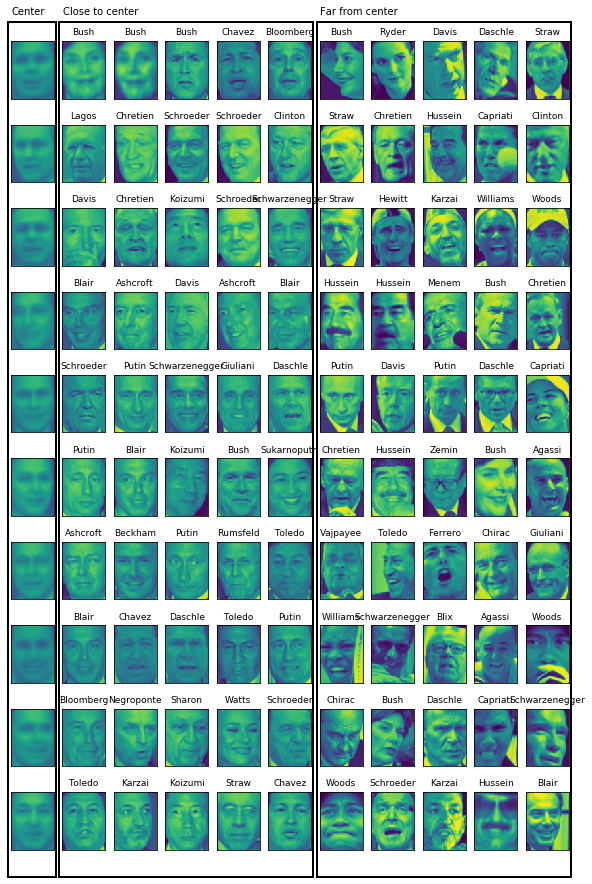

In [76]:
mg.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [77]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict((X_pca))
print("Cluster size agglomerative clustering:{}".format(np.bincount(labels_agg)))

Cluster size agglomerative clustering:[458  55  76 636 121  53  23  94 121 172]


In [78]:
print("ARI:{:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI:0.08


Text(0, 0.5, 'Cluster distance')

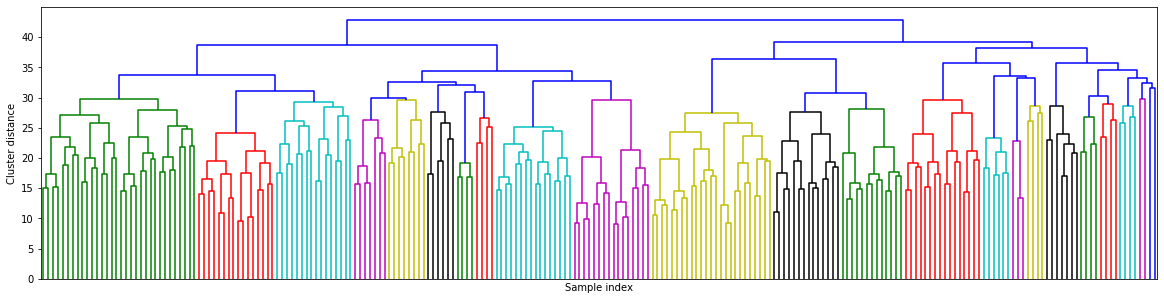

In [79]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

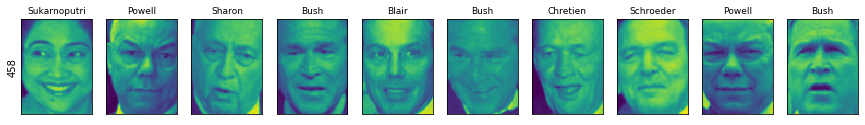

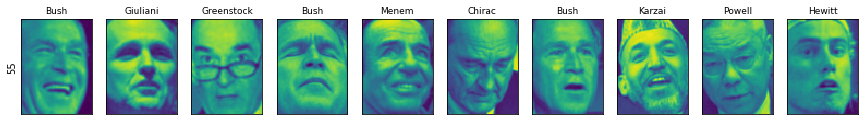

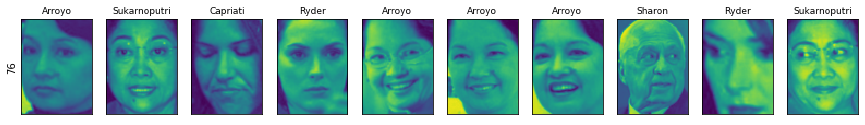

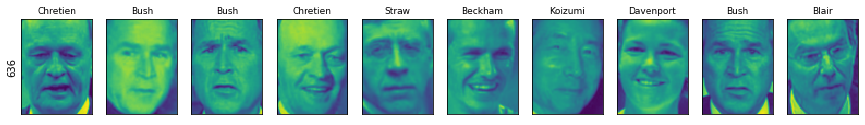

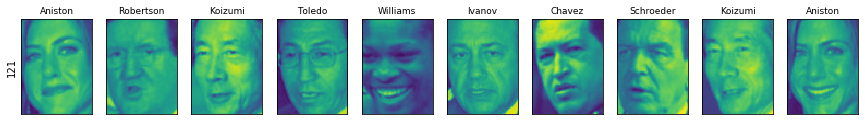

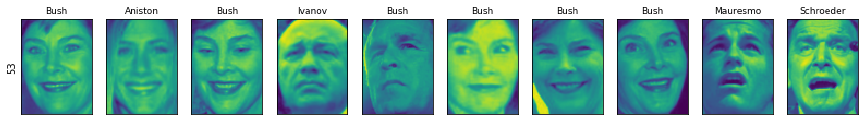

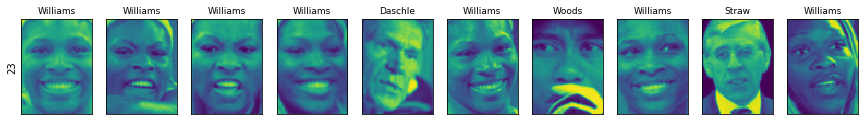

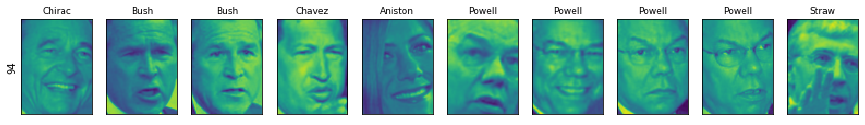

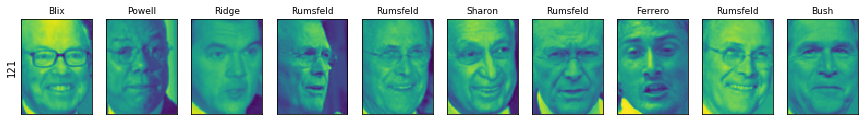

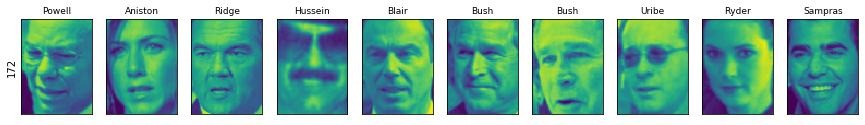

In [82]:
n_cluster = 10
for cluster in range(n_cluster):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={"xticks" : (), "yticks" : ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize' : 9})